In [1]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt

<IPython.core.display.Javascript object>


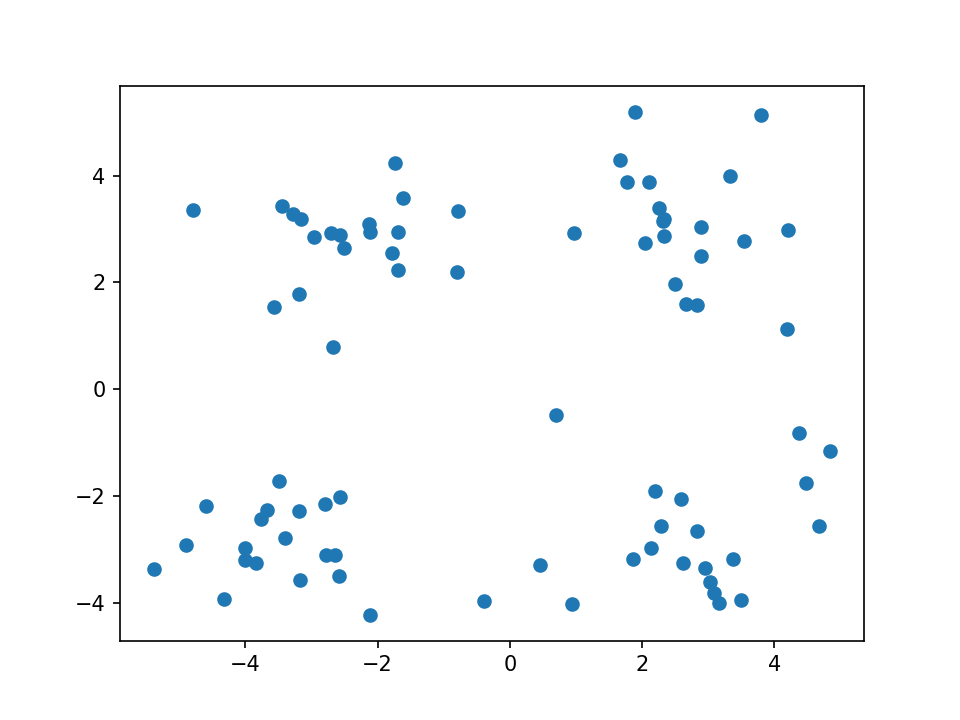

In [2]:
data = np.genfromtxt('kmeans.txt', delimiter=' ')
plt.scatter(data[:,0], data[:,1])

In [3]:
# calculate the distance between two points
def euclDistance(point_1, point_2): 
    point_1, point_2 = np.array(point_1), np.array(point_2)
    return np.sqrt(np.sum((point_1 - point_2) ** 2))

In [4]:
# initialize the central points randomly
def initCentroids(dataset, k):  
    '''
    Instructions: initialize the central points randomly
    
    Parameters:
        dataset: the training set
        k: number of centers
    
    Return:
        the coordinates of center
    '''
    num_samples, cols = dataset.shape
    # k centers, and the number of cols equals to that of dataset
    centroids = np.zeros((k, cols))
    
    for i in range(k):  
        # pick an index randomly
        index = int(np.random.uniform(0, num_samples))
        centroids[i, :] = dataset[index, :]  
    return centroids  

In [5]:
def kmeans(data, k):  
    '''
    Instructions: training the dataset into k clusters
    
    Parameters:
        data: the training set
        k: the number of clusters
    
    Return:
        centroids: the value of cluster center 
        clusterData: the data belongs to each cluster
    '''
    #  get the number of samples
    num_samples = data.shape[0]   
    # create an array to store the attributes of dataset, first col records the belonging cluster, second col records the error between 
    # the sample and cluster center
    cluster_data = np.zeros((num_samples, 2)) 
    # create a flag to judge if the center changes, default is true
    cluster_changed = True  
  
    # initialize the cluster center 
    centroids = initCentroids(data, k)  
  
    while cluster_changed:  
        cluster_changed = False  
        
        for i in range(num_samples):  
            # define a minmium distance 
            minDist  = 100000.0  
            # used for the index of cluster
            minIndex = 0  
            # calculate the distance between sample and each cluster center
            for j in range(k):  
                distance = euclDistance(centroids[j,:], data[i,:])
                # update the minmium and the belonged center
                if distance < minDist:  
                    # store the current minmiun distance into the second col
                    minDist  = distance 
                    cluster_data[1, 1] = minDist
                    # update the cluster
                    minIndex = j  
              
            # if the belonged cluster changed, then update it into the first col of cluster_data
            if cluster_data[i, 0] != minIndex:
                # the centers should be updated again!
                cluster_changed = True
                # update the cluster for sample i.
                cluster_data[i, 0] = minIndex
  
        # calculate the new cluster center after iter each sample
        for j in range(k):
            # get the all points belongs to cluster j
            pointsInCluster  = data[cluster_data[:, 0] == j, :]
            # calculate the center 
            centroids[j, :] = np.mean(pointsInCluster, axis = 0) 

    return centroids, cluster_data  

# Training the dateset

In [6]:
# set k = 4
k = 4  
# get the cluster center and attributes of each sample
centroids, clusterData = kmeans(data, k)  
if np.isnan(centroids).any():
    print('Error')
else:
    print('cluster complete!')  
    print(centroids)

cluster complete!
[[ 2.6265299   3.10868015]
 [ 2.80293085 -2.7315146 ]
 [-2.46154315  2.78737555]
 [-3.38237045 -2.9473363 ]]


<IPython.core.display.Javascript object>


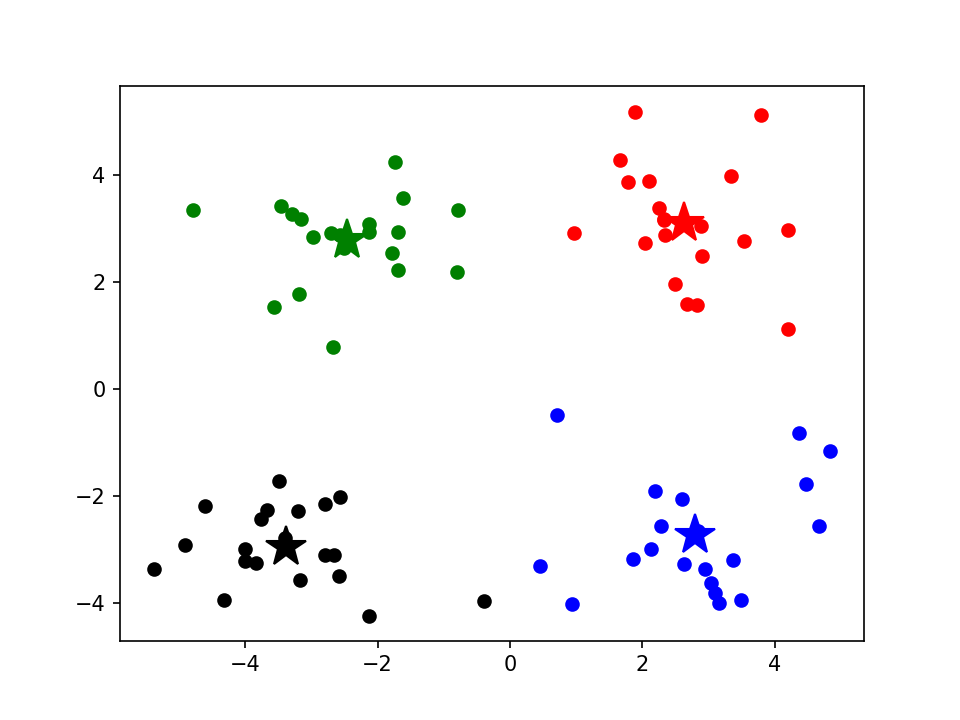

In [7]:
def showCluster(data, k, centroids, clusterData):  
    '''
    Instructions: Visualize the dataSet and clusters
    
    Parameters:
        data: the training set
        k: the number of clusters
        centroids: the cluster centers
        clusterData: the attributes of samples, first col records the belonging cluster, second col records the error between the sample and cluster center
    
    '''
    
    num_samples, cols= data.shape  
    if cols != 2:  
        print("dimension of your data is not 2!")  
        return 1  
  
    # using the different colors and shapes to represent each samples
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']  
    if k > len(mark):  
        print("Your k is too large!")  
        return 1  
  
    # plot the sample point 
    for i in range(num_samples):  
        markIndex = int(clusterData[i, 0])  
        plt.plot(data[i, 0], data[i, 1], mark[markIndex])  
  
    # using the different colors and shapes to represent each clusters
    mark = ['*r', '*b', '*g', '*k', '^b', '+b', 'sb', 'db', '<b', 'pb']  
    for i in range(k):  
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 20)  
    plt.show()

showCluster(data, k, centroids, clusterData) 

In [8]:
def prediction(testset, centroids):
    '''
    Instructions: predict the cluster of testset
    
    Parameters:
        test: the testing set
        centroids: the cluster center
    
    Return:
        the cluster index for each testing points
    '''
    return np.array([np.argmin(np.sum((np.tile(point, (len(centroids), 1)) - centroids) ** 2, axis = 1)) for point in testset])

# plot the decision boundary and clusters

<IPython.core.display.Javascript object>


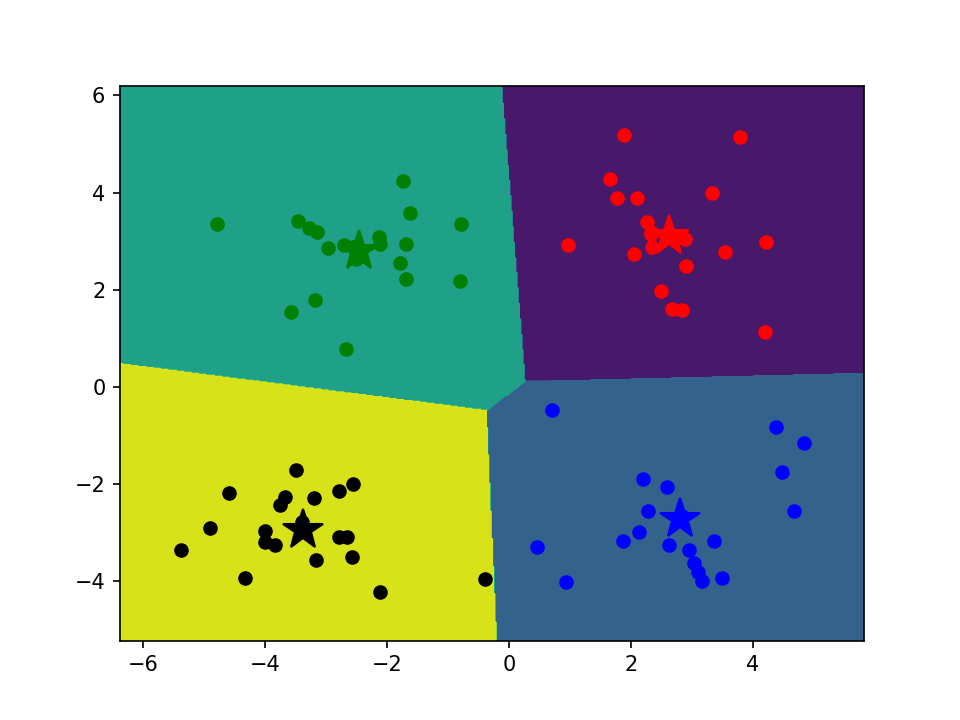

In [9]:
def plot_decision_boundary(predict, data, centroids, clusterData):
    '''
    Instructions: plot the clusters and the boundary
    
    Parameters:
        predict: the model after training
        data: the original data
        centroids: the cluster center
        clusterData: the attributers of each sample
    
    ''' 
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

    # 生成网格矩阵
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    z = predict(np.c_[xx.ravel(), yy.ravel()], centroids=centroids)# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
    z = z.reshape(xx.shape)
    # 等高线图
    cs = plt.contourf(xx, yy, z)
    # 显示结果
    showCluster(data, k, centroids, clusterData)  

plot_decision_boundary(prediction, data, centroids, clusterData)

# choose the best K

In [10]:
# define a list to store the loss
list_lost = []
for k in range(2,11):
    min_loss = 10000
    for i in range(50):
        centroids, clusterData = kmeans(data, k) 
        # calculate the loss
        loss = sum(clusterData[:,1])/data.shape[0]
        if loss < min_loss:
            min_loss = loss
    list_lost.append(min_loss)

# plt.plot(range(2,11), list_lost, color = 'red', marker = '*')
# plt.xlabel('K')
# plt.ylabel('Loss')

d:\language\python\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
d:\language\python\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
